# Condition Based Maintence of Naval Vessel

Data Obtained from UCI: http://archive.ics.uci.edu/ml/datasets/condition+based+maintenance+of+naval+propulsion+plants#

Dataset information
The experiments have been carried out by means of a numerical simulator of a naval vessel (Frigate) characterized by a Gas Turbine (GT) propulsion plant. The different blocks forming the complete simulator (Propeller, Hull, GT, Gear Box and Controller) have been developed and fine tuned over the year on several similar real propulsion plants. In view of these observations the available data are in agreement with a possible real vessel.
            
In this release of the simulator it is also possible to take into account the performance decay over time of the GT components such as GT compressor and turbines.

The propulsion system behaviour has been described with this parameters:
    Ship speed (linear function of the lever position lp)
    Compressor degradation coefficient kMc.
    Turbine degradation coefficient kMt
    
so that each possible degradation state can be described by a combination of this triple (lp,kMt,kMc).

The range of decay of compressor and turbine has been sampled with an uniform grid of precision 0.001 so to have a good granularity of representation

In particular for the compressor decay state discretization the kMc coefficient has been investigated in the domain [1; 0.95], and the turbine coefficient in the domain [1; 0.975]

Ship speed has been investigated sampling the range of feasible speed from 3 knots to 27 knots with a granularity of representation equal to tree knots

A series of measures (16 features) which indirectly represents of the state of the system subject to performance decay has been acquired and stored in the dataset over the parameter’s space.

Attribute Information:

A 16-feature vector containing the GT measures at steady state of the physical asset:

    Lever position (lp) [ ]

    Ship speed (v) [knots]

    Gas Turbine (GT) shaft torque (GTT) [kN m]

    GT rate of revolutions (GTn) [rpm]

    Gas Generator rate of revolutions (GGn) [rpm]

    Starboard Propeller Torque (Ts) [kN]

    Port Propeller Torque (Tp) [kN]

    Hight Pressure (HP) Turbine exit temperature (T48) [C]

    GT Compressor inlet air temperature (T1) [C]

    GT Compressor outlet air temperature (T2) [C]

    HP Turbine exit pressure (P48) [bar]

    GT Compressor inlet air pressure (P1) [bar]

    GT Compressor outlet air pressure (P2) [bar]

    GT exhaust gas pressure (Pexh) [bar]

    Turbine Injecton Control (TIC) [%]

    Fuel flow (mf) [kg/s]

A 2 -feature vector containing information about turbine and compressor decay

    GT Compressor decay state coefficient

    GT Turbine decay state coefficient

Goals:
Identify factors that have impact on Compressor decay and relay information to preventative maintence team
Develop and evaluate best model to predict decay state coefficient (logreg,CART,RFC,DNN, etc.)

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline

# Read Txt File

In [2]:
df = pd.read_table('UCI CBM Dataset/data.txt', sep = ' ' , header = None)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11934 entries, 0 to 11933
Data columns (total 55 columns):
0     0 non-null float64
1     0 non-null float64
2     0 non-null float64
3     11934 non-null float64
4     0 non-null float64
5     0 non-null float64
6     11934 non-null float64
7     0 non-null float64
8     0 non-null float64
9     11934 non-null float64
10    0 non-null float64
11    0 non-null float64
12    11934 non-null float64
13    0 non-null float64
14    0 non-null float64
15    11934 non-null float64
16    0 non-null float64
17    0 non-null float64
18    11934 non-null float64
19    0 non-null float64
20    0 non-null float64
21    11934 non-null float64
22    0 non-null float64
23    0 non-null float64
24    11934 non-null float64
25    0 non-null float64
26    0 non-null float64
27    11934 non-null float64
28    0 non-null float64
29    0 non-null float64
30    11934 non-null float64
31    0 non-null float64
32    0 non-null float64
33    11934 non-null float

In [3]:
df = df.dropna(axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11934 entries, 0 to 11933
Data columns (total 18 columns):
3     11934 non-null float64
6     11934 non-null float64
9     11934 non-null float64
12    11934 non-null float64
15    11934 non-null float64
18    11934 non-null float64
21    11934 non-null float64
24    11934 non-null float64
27    11934 non-null float64
30    11934 non-null float64
33    11934 non-null float64
36    11934 non-null float64
39    11934 non-null float64
42    11934 non-null float64
45    11934 non-null float64
48    11934 non-null float64
51    11934 non-null float64
54    11934 non-null float64
dtypes: float64(18)
memory usage: 1.6 MB


In [4]:
df.head(5)

,3,6,9,12,15,18,21,24,27,30,33,36,39,42,45,48,51,54
0,1.138,3.0,289.964,1349.489,6677.380,7.584,7.584,464.006,288.0,550.563,1.096,0.998,5.947,1.019,7.137,0.082,0.95,0.975
1,2.088,6.0,6960.180,1376.166,6828.469,28.204,28.204,635.401,288.0,581.658,1.331,0.998,7.282,1.019,10.655,0.287,0.95,0.975
2,3.144,9.0,8379.229,1386.757,7111.811,60.358,60.358,606.002,288.0,587.587,1.389,0.998,7.574,1.020,13.086,0.259,0.95,0.975
3,4.161,12.0,14724.395,1547.465,7792.630,113.774,113.774,661.471,288.0,613.851,1.658,0.998,9.007,1.022,18.109,0.358,0.95,0.975
4,5.140,15.0,21636.432,1924.313,8494.777,175.306,175.306,731.494,288.0,645.642,2.078,0.998,11.197,1.026,26.373,0.522,0.95,0.975


In [5]:
cols = pd.read_table('UCI CBM Dataset/Features.txt',names = 'x')
np.transpose(cols.as_matrix())

array([['1 - Lever position (lp) [ ]', '2 - Ship speed (v) [knots]',
        '3 - Gas Turbine shaft torque (GTT) [kN m]',
        '4 - Gas Turbine rate of revolutions (GTn) [rpm]',
        '5 - Gas Generator rate of revolutions (GGn) [rpm]',
        '6 - Starboard Propeller Torque (Ts) [kN]',
        '7 - Port Propeller Torque (Tp) [kN]',
        '8 - HP Turbine exit temperature (T48) [C]',
        '9 - GT Compressor inlet air temperature (T1) [C]',
        '10 - GT Compressor outlet air temperature (T2) [C]',
        '11 - HP Turbine exit pressure (P48) [bar]',
        '12 - GT Compressor inlet air pressure (P1) [bar]',
        '13 - GT Compressor outlet air pressure (P2) [bar]',
        '14 - Gas Turbine exhaust gas pressure (Pexh) [bar]',
        '15 - Turbine Injecton Control (TIC) [%]',
        '16 - Fuel flow (mf) [kg/s]',
        '17 - GT Compressor decay state coefficient.',
        '18 - GT Turbine decay state coefficient. ']], dtype=object)

In [6]:
col_names = ['1 - Lever position (lp) [ ]', '2 - Ship speed (v) [knots]',
        '3 - Gas Turbine shaft torque (GTT) [kN m]',
        '4 - Gas Turbine rate of revolutions (GTn) [rpm]',
        '5 - Gas Generator rate of revolutions (GGn) [rpm]',
        '6 - Starboard Propeller Torque (Ts) [kN]',
        '7 - Port Propeller Torque (Tp) [kN]',
        '8 - HP Turbine exit temperature (T48) [C]',
        '9 - GT Compressor inlet air temperature (T1) [C]',
        '10 - GT Compressor outlet air temperature (T2) [C]',
        '11 - HP Turbine exit pressure (P48) [bar]',
        '12 - GT Compressor inlet air pressure (P1) [bar]',
        '13 - GT Compressor outlet air pressure (P2) [bar]',
        '14 - Gas Turbine exhaust gas pressure (Pexh) [bar]',
        '15 - Turbine Injecton Control (TIC) [%]',
        '16 - Fuel flow (mf) [kg/s]',
        '17 - GT Compressor decay state coefficient.',
        '18 - GT Turbine decay state coefficient. ']

In [7]:
df.columns = col_names
df.head(5)

,1 - Lever position (lp) [ ],2 - Ship speed (v) [knots],3 - Gas Turbine shaft torque (GTT) [kN m],4 - Gas Turbine rate of revolutions (GTn) [rpm],5 - Gas Generator rate of revolutions (GGn) [rpm],6 - Starboard Propeller Torque (Ts) [kN],7 - Port Propeller Torque (Tp) [kN],8 - HP Turbine exit temperature (T48) [C],9 - GT Compressor inlet air temperature (T1) [C],10 - GT Compressor outlet air temperature (T2) [C],11 - HP Turbine exit pressure (P48) [bar],12 - GT Compressor inlet air pressure (P1) [bar],13 - GT Compressor outlet air pressure (P2) [bar],14 - Gas Turbine exhaust gas pressure (Pexh) [bar],15 - Turbine Injecton Control (TIC) [%],16 - Fuel flow (mf) [kg/s],17 - GT Compressor decay state coefficient.,18 - GT Turbine decay state coefficient.
0,1.138,3.0,289.964,1349.489,6677.380,7.584,7.584,464.006,288.0,550.563,1.096,0.998,5.947,1.019,7.137,0.082,0.95,0.975
1,2.088,6.0,6960.180,1376.166,6828.469,28.204,28.204,635.401,288.0,581.658,1.331,0.998,7.282,1.019,10.655,0.287,0.95,0.975
2,3.144,9.0,8379.229,1386.757,7111.811,60.358,60.358,606.002,288.0,587.587,1.389,0.998,7.574,1.020,13.086,0.259,0.95,0.975
3,4.161,12.0,14724.395,1547.465,7792.630,113.774,113.774,661.471,288.0,613.851,1.658,0.998,9.007,1.022,18.109,0.358,0.95,0.975
4,5.140,15.0,21636.432,1924.313,8494.777,175.306,175.306,731.494,288.0,645.642,2.078,0.998,11.197,1.026,26.373,0.522,0.95,0.975


In [8]:
df.tail(5)

,1 - Lever position (lp) [ ],2 - Ship speed (v) [knots],3 - Gas Turbine shaft torque (GTT) [kN m],4 - Gas Turbine rate of revolutions (GTn) [rpm],5 - Gas Generator rate of revolutions (GGn) [rpm],6 - Starboard Propeller Torque (Ts) [kN],7 - Port Propeller Torque (Tp) [kN],8 - HP Turbine exit temperature (T48) [C],9 - GT Compressor inlet air temperature (T1) [C],10 - GT Compressor outlet air temperature (T2) [C],11 - HP Turbine exit pressure (P48) [bar],12 - GT Compressor inlet air pressure (P1) [bar],13 - GT Compressor outlet air pressure (P2) [bar],14 - Gas Turbine exhaust gas pressure (Pexh) [bar],15 - Turbine Injecton Control (TIC) [%],16 - Fuel flow (mf) [kg/s],17 - GT Compressor decay state coefficient.,18 - GT Turbine decay state coefficient.
11929,5.140,15.0,21624.934,1924.342,8470.013,175.239,175.239,681.658,288.0,628.950,2.087,0.998,10.990,1.027,23.803,0.471,1.0,1.0
11930,6.175,18.0,29763.213,2306.745,8800.352,245.954,245.954,747.405,288.0,658.853,2.512,0.998,13.109,1.031,32.671,0.647,1.0,1.0
11931,7.148,21.0,39003.867,2678.052,9120.889,332.389,332.389,796.457,288.0,680.393,2.982,0.998,15.420,1.036,42.104,0.834,1.0,1.0
11932,8.206,24.0,50992.579,3087.434,9300.274,438.024,438.024,892.945,288.0,722.029,3.594,0.998,18.293,1.043,58.064,1.149,1.0,1.0
11933,9.300,27.0,72775.130,3560.400,9742.950,644.880,644.880,1038.411,288.0,767.595,4.531,0.998,22.464,1.052,86.067,1.704,1.0,1.0


# Add Features

In [9]:
df['Compressor'] = df.iloc[:,16].apply(lambda x: 0 if x >= df.iloc[:,16].mean() else 1)
df['Turbine'] = df.iloc[:,17].apply(lambda x: 0 if x >= df.iloc[:,17].mean() else 1)
print(df.head())
print(df.tail())

   1 - Lever position (lp) [ ]  2 - Ship speed (v) [knots]  \
0                        1.138                         3.0   
1                        2.088                         6.0   
2                        3.144                         9.0   
3                        4.161                        12.0   
4                        5.140                        15.0   

   3 - Gas Turbine shaft torque (GTT) [kN m]  \
0                                    289.964   
1                                   6960.180   
2                                   8379.229   
3                                  14724.395   
4                                  21636.432   

   4 - Gas Turbine rate of revolutions (GTn) [rpm]  \
0                                         1349.489   
1                                         1376.166   
2                                         1386.757   
3                                         1547.465   
4                                         1924.313   

   5 - Gas Ge

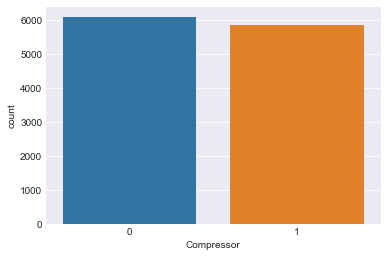

In [219]:
sns.countplot(x='Compressor',data=df)

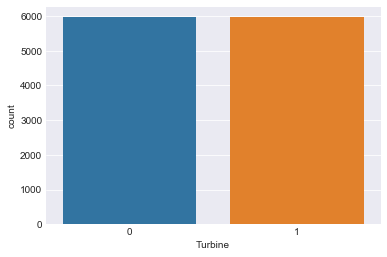

In [220]:
sns.countplot(x='Turbine',data=df)

# EDA

In [136]:
df.describe()

,1 - Lever position (lp) [ ],2 - Ship speed (v) [knots],3 - Gas Turbine shaft torque (GTT) [kN m],4 - Gas Turbine rate of revolutions (GTn) [rpm],5 - Gas Generator rate of revolutions (GGn) [rpm],6 - Starboard Propeller Torque (Ts) [kN],7 - Port Propeller Torque (Tp) [kN],8 - HP Turbine exit temperature (T48) [C],9 - GT Compressor inlet air temperature (T1) [C],10 - GT Compressor outlet air temperature (T2) [C],11 - HP Turbine exit pressure (P48) [bar],12 - GT Compressor inlet air pressure (P1) [bar],13 - GT Compressor outlet air pressure (P2) [bar],14 - Gas Turbine exhaust gas pressure (Pexh) [bar],15 - Turbine Injecton Control (TIC) [%],16 - Fuel flow (mf) [kg/s],17 - GT Compressor decay state coefficient.,18 - GT Turbine decay state coefficient.,Compressor,Turbine
count,11934.000000,11934.000000,11934.000000,11934.000000,11934.000000,11934.000000,11934.000000,11934.000000,11934.0,11934.000000,11934.000000,1.193400e+04,11934.000000,11934.000000,11934.000000,11934.000000,11934.00000,11934.0000,11934.000000,11934.000000
mean,5.166667,15.000000,27247.498685,2136.289256,8200.947312,227.335768,227.335768,735.495446,288.0,646.215331,2.352963,9.980000e-01,12.297123,1.029474,33.641261,0.662440,0.97500,0.9875,0.490196,0.500000
std,2.626388,7.746291,22148.613155,774.083881,1091.315507,200.495889,200.495889,173.680552,0.0,72.675882,1.084770,2.533635e-13,5.337448,0.010390,25.841363,0.507132,0.01472,0.0075,0.499925,0.500021
min,1.138000,3.000000,253.547000,1307.675000,6589.002000,5.304000,5.304000,442.364000,288.0,540.442000,1.093000,9.980000e-01,5.828000,1.019000,0.000000,0.068000,0.95000,0.9750,0.000000,0.000000
25%,3.144000,9.000000,8375.883750,1386.758000,7058.324000,60.317000,60.317000,589.872750,288.0,578.092250,1.389000,9.980000e-01,7.447250,1.020000,13.677500,0.246000,0.96200,0.9810,0.000000,0.000000
50%,5.140000,15.000000,21630.659000,1924.326000,8482.081500,175.268000,175.268000,706.038000,288.0,637.141500,2.083000,9.980000e-01,11.092000,1.026000,25.276500,0.496000,0.97500,0.9875,0.000000,0.500000
75%,7.148000,21.000000,39001.426750,2678.079000,9132.606000,332.364750,332.364750,834.066250,288.0,693.924500,2.981000,9.980000e-01,15.658000,1.036000,44.552500,0.882000,0.98800,0.9940,1.000000,1.000000
max,9.300000,27.000000,72784.872000,3560.741000,9797.103000,645.249000,645.249000,1115.797000,288.0,789.094000,4.560000,9.980000e-01,23.140000,1.052000,92.556000,1.832000,1.00000,1.0000,1.000000,1.000000


In [10]:
#drop 9 and 12 as no std 
df.drop('9 - GT Compressor inlet air temperature (T1) [C]',axis=1,inplace=True)
df.drop('12 - GT Compressor inlet air pressure (P1) [bar]',axis=1,inplace=True)
#drop 17 and 18 as not needed
df.drop('17 - GT Compressor decay state coefficient.',axis=1,inplace=True)
df.drop(15,axis=1,inplace=True)
df.head()

,1 - Lever position (lp) [ ],2 - Ship speed (v) [knots],3 - Gas Turbine shaft torque (GTT) [kN m],4 - Gas Turbine rate of revolutions (GTn) [rpm],5 - Gas Generator rate of revolutions (GGn) [rpm],6 - Starboard Propeller Torque (Ts) [kN],7 - Port Propeller Torque (Tp) [kN],8 - HP Turbine exit temperature (T48) [C],10 - GT Compressor outlet air temperature (T2) [C],11 - HP Turbine exit pressure (P48) [bar],13 - GT Compressor outlet air pressure (P2) [bar],14 - Gas Turbine exhaust gas pressure (Pexh) [bar],15 - Turbine Injecton Control (TIC) [%],16 - Fuel flow (mf) [kg/s],18 - GT Turbine decay state coefficient.,Compressor,Turbine
0,1.138,3.0,289.964,1349.489,6677.380,7.584,7.584,464.006,550.563,1.096,5.947,1.019,7.137,0.082,0.975,1,1
1,2.088,6.0,6960.180,1376.166,6828.469,28.204,28.204,635.401,581.658,1.331,7.282,1.019,10.655,0.287,0.975,1,1
2,3.144,9.0,8379.229,1386.757,7111.811,60.358,60.358,606.002,587.587,1.389,7.574,1.020,13.086,0.259,0.975,1,1
3,4.161,12.0,14724.395,1547.465,7792.630,113.774,113.774,661.471,613.851,1.658,9.007,1.022,18.109,0.358,0.975,1,1
4,5.140,15.0,21636.432,1924.313,8494.777,175.306,175.306,731.494,645.642,2.078,11.197,1.026,26.373,0.522,0.975,1,1


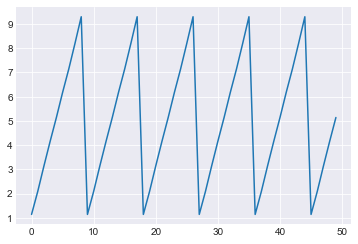

In [73]:
df['1 - Lever position (lp) [ ]'].iloc[0:50].plot()

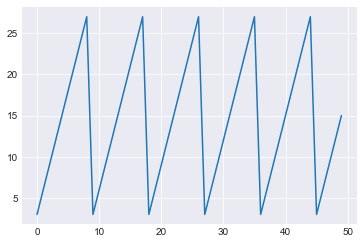

In [74]:
df['2 - Ship speed (v) [knots]'].iloc[0:50].plot()

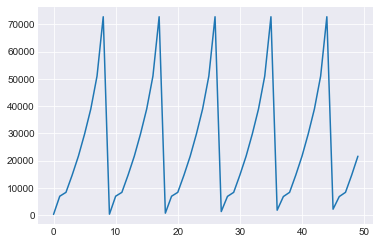

In [75]:
df['3 - Gas Turbine shaft torque (GTT) [kN m]'].iloc[0:50].plot()

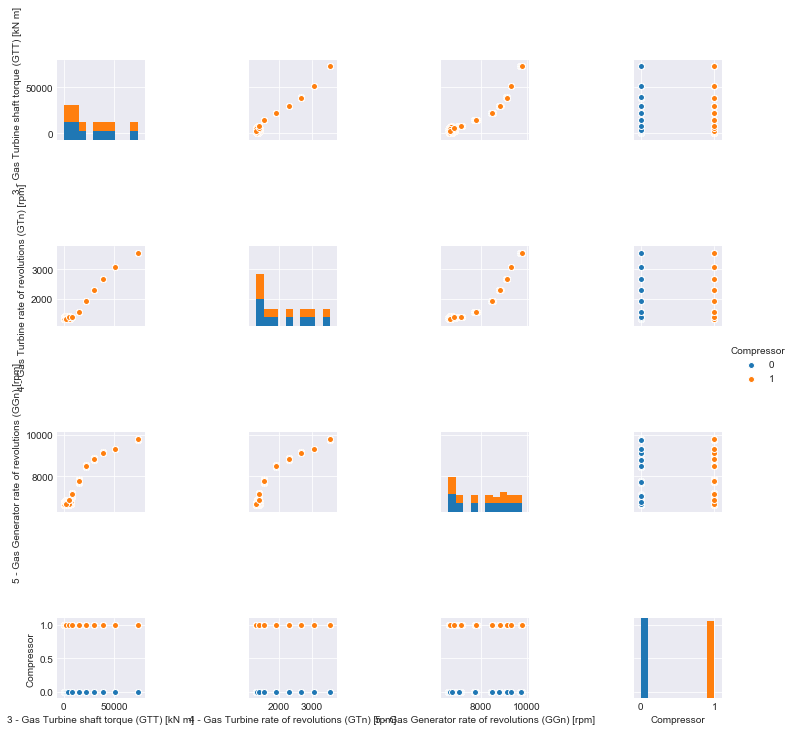

In [154]:
sns.pairplot(df.iloc[:,[2,3,4,15]],hue='Compressor')

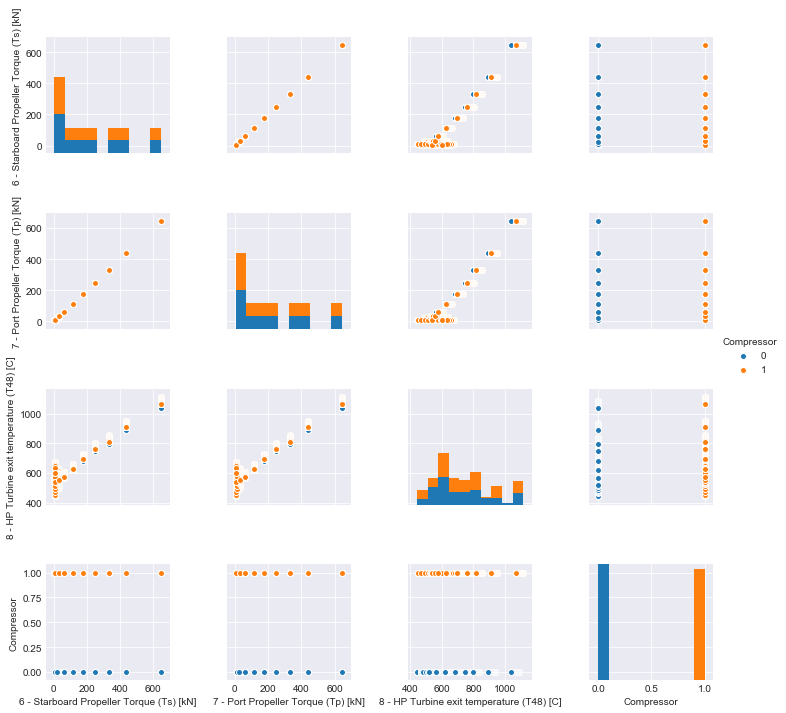

In [155]:
sns.pairplot(df.iloc[:,[5,6,7,15]],hue='Compressor')

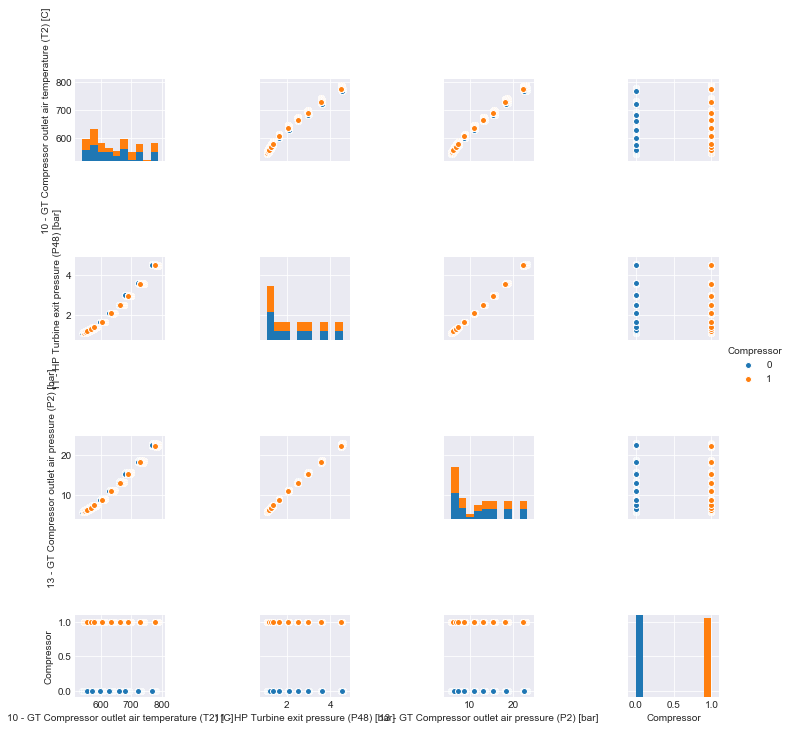

In [156]:
sns.pairplot(df.iloc[:,[8,9,10,15]],hue='Compressor')

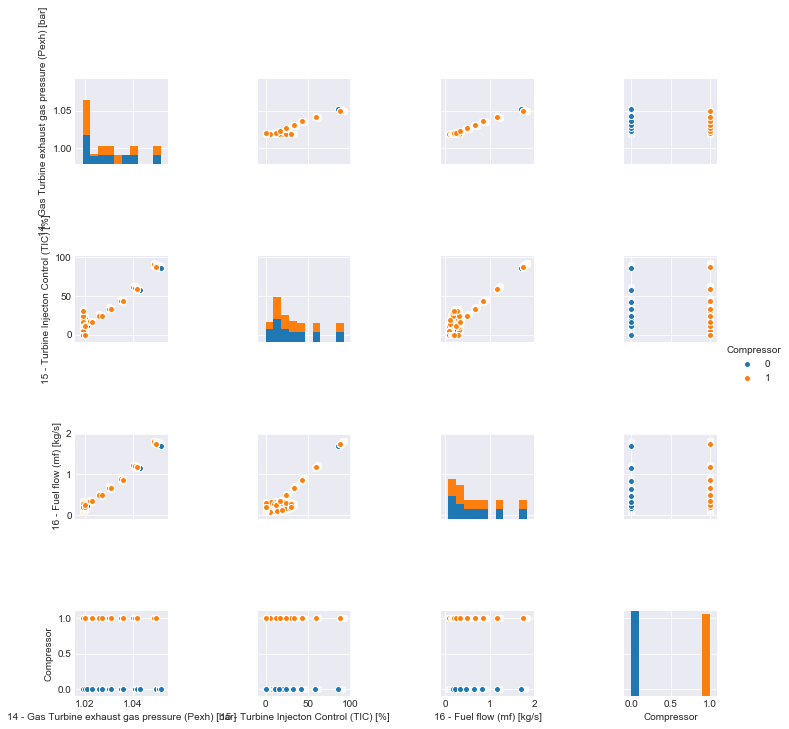

In [157]:
sns.pairplot(df.iloc[:,[11,12,13,15]],hue='Compressor')

# Standardize 

In [11]:
from sklearn.preprocessing import StandardScaler

In [12]:
scaler = StandardScaler()

In [13]:
X = pd.DataFrame(df.iloc[:,0:14])
X.head()

,1 - Lever position (lp) [ ],2 - Ship speed (v) [knots],3 - Gas Turbine shaft torque (GTT) [kN m],4 - Gas Turbine rate of revolutions (GTn) [rpm],5 - Gas Generator rate of revolutions (GGn) [rpm],6 - Starboard Propeller Torque (Ts) [kN],7 - Port Propeller Torque (Tp) [kN],8 - HP Turbine exit temperature (T48) [C],10 - GT Compressor outlet air temperature (T2) [C],11 - HP Turbine exit pressure (P48) [bar],13 - GT Compressor outlet air pressure (P2) [bar],14 - Gas Turbine exhaust gas pressure (Pexh) [bar],15 - Turbine Injecton Control (TIC) [%],16 - Fuel flow (mf) [kg/s]
0,1.138,3.0,289.964,1349.489,6677.380,7.584,7.584,464.006,550.563,1.096,5.947,1.019,7.137,0.082
1,2.088,6.0,6960.180,1376.166,6828.469,28.204,28.204,635.401,581.658,1.331,7.282,1.019,10.655,0.287
2,3.144,9.0,8379.229,1386.757,7111.811,60.358,60.358,606.002,587.587,1.389,7.574,1.020,13.086,0.259
3,4.161,12.0,14724.395,1547.465,7792.630,113.774,113.774,661.471,613.851,1.658,9.007,1.022,18.109,0.358
4,5.140,15.0,21636.432,1924.313,8494.777,175.306,175.306,731.494,645.642,2.078,11.197,1.026,26.373,0.522


In [14]:
y = pd.DataFrame(df.iloc[:,15])
y.head()

,Compressor
0,1
1,1
2,1
3,1
4,1


In [15]:
scaler.fit(X)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [16]:
X = pd.DataFrame(scaler.transform(X),columns = df.columns[:-3])

In [17]:
X.head()

,1 - Lever position (lp) [ ],2 - Ship speed (v) [knots],3 - Gas Turbine shaft torque (GTT) [kN m],4 - Gas Turbine rate of revolutions (GTn) [rpm],5 - Gas Generator rate of revolutions (GGn) [rpm],6 - Starboard Propeller Torque (Ts) [kN],7 - Port Propeller Torque (Tp) [kN],8 - HP Turbine exit temperature (T48) [C],10 - GT Compressor outlet air temperature (T2) [C],11 - HP Turbine exit pressure (P48) [bar],13 - GT Compressor outlet air pressure (P2) [bar],14 - Gas Turbine exhaust gas pressure (Pexh) [bar],15 - Turbine Injecton Control (TIC) [%],16 - Fuel flow (mf) [kg/s]
0,-1.533984,-1.549193,-1.217172,-1.016470,-1.396142,-1.096087,-1.096087,-1.563219,-1.316205,-1.158785,-1.189780,-1.008090,-1.025696,-1.144602
1,-1.172255,-1.161895,-0.916002,-0.982006,-1.257689,-0.993238,-0.993238,-0.576338,-0.888328,-0.942140,-0.939650,-1.008090,-0.889552,-0.740351
2,-0.770165,-0.774597,-0.851930,-0.968324,-0.998045,-0.832859,-0.832859,-0.745615,-0.806743,-0.888671,-0.884940,-0.911843,-0.795474,-0.795566
3,-0.382925,-0.387298,-0.565436,-0.760704,-0.374167,-0.566428,-0.566428,-0.426228,-0.445343,-0.640681,-0.616448,-0.719348,-0.601087,-0.600342
4,-0.010154,0.000000,-0.253348,-0.273853,0.269255,-0.259516,-0.259516,-0.023040,-0.007889,-0.253486,-0.206123,-0.334358,-0.281276,-0.276941


# Import Test/Train Spilt and Metrics Libraries

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Fit DNN

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [40]:
import tensorflow.contrib.learn as learn

C:\Users\trevo\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [41]:
import tensorflow as tf

In [43]:
feature_columns = learn.infer_real_valued_columns_from_input(X_train)

In [59]:
classifier = learn.DNNClassifier(hidden_units=[5,10,10,20,10,10,5], feature_columns=feature_columns)
classifier.fit(X_train, y_train, steps=40000)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x0000028EEB74A6A0>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_train_distribute': None, '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1.0
}
, '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_log_step_count_steps': 100, '_session_config': None, '_save_checkpoints_steps': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_model_dir': 'C:\\Users\\trevo\\AppData\\Local\\Temp\\tmp7yna9crx'}
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 1 into C:\Users\trevo\AppData\Local\Temp\tmp7yna9crx

INFO:tensorflow:loss = 0.1412337, step = 6701 (1.437 sec)
INFO:tensorflow:global_step/sec: 69.0181
INFO:tensorflow:loss = 0.14712997, step = 6801 (1.433 sec)
INFO:tensorflow:global_step/sec: 66.7205
INFO:tensorflow:loss = 0.16202325, step = 6901 (1.514 sec)
INFO:tensorflow:global_step/sec: 67.1309
INFO:tensorflow:loss = 0.147946, step = 7001 (1.474 sec)
INFO:tensorflow:global_step/sec: 70.2206
INFO:tensorflow:loss = 0.12644567, step = 7101 (1.424 sec)
INFO:tensorflow:global_step/sec: 69.2699
INFO:tensorflow:loss = 0.15282954, step = 7201 (1.444 sec)
INFO:tensorflow:global_step/sec: 69.8478
INFO:tensorflow:loss = 0.12875852, step = 7301 (1.432 sec)
INFO:tensorflow:global_step/sec: 66.8295
INFO:tensorflow:loss = 0.13098018, step = 7401 (1.496 sec)
INFO:tensorflow:global_step/sec: 67.3539
INFO:tensorflow:loss = 0.13226968, step = 7501 (1.485 sec)
INFO:tensorflow:global_step/sec: 68.4437
INFO:tensorflow:loss = 0.12306633, step = 7601 (1.461 sec)
INFO:tensorflow:global_step/sec: 67.6011
INF

INFO:tensorflow:global_step/sec: 63.2911
INFO:tensorflow:loss = 0.06927102, step = 14901 (1.564 sec)
INFO:tensorflow:global_step/sec: 65.0166
INFO:tensorflow:loss = 0.06684568, step = 15001 (1.538 sec)
INFO:tensorflow:global_step/sec: 67.8432
INFO:tensorflow:loss = 0.0679488, step = 15101 (1.490 sec)
INFO:tensorflow:global_step/sec: 66.1045
INFO:tensorflow:loss = 0.06841982, step = 15201 (1.497 sec)
INFO:tensorflow:global_step/sec: 65.2511
INFO:tensorflow:loss = 0.07138857, step = 15301 (1.533 sec)
INFO:tensorflow:global_step/sec: 61.7191
INFO:tensorflow:loss = 0.070645444, step = 15401 (1.620 sec)
INFO:tensorflow:global_step/sec: 61.9645
INFO:tensorflow:loss = 0.06941735, step = 15501 (1.614 sec)
INFO:tensorflow:global_step/sec: 63.8671
INFO:tensorflow:loss = 0.070540756, step = 15601 (1.568 sec)
INFO:tensorflow:global_step/sec: 64.6183
INFO:tensorflow:loss = 0.09448745, step = 15701 (1.546 sec)
INFO:tensorflow:global_step/sec: 64.3254
INFO:tensorflow:loss = 0.06419633, step = 15801 (

INFO:tensorflow:global_step/sec: 63.2514
INFO:tensorflow:loss = 0.056552768, step = 23001 (1.581 sec)
INFO:tensorflow:global_step/sec: 62.9017
INFO:tensorflow:loss = 0.052364588, step = 23101 (1.590 sec)
INFO:tensorflow:global_step/sec: 56.5951
INFO:tensorflow:loss = 0.058132045, step = 23201 (1.767 sec)
INFO:tensorflow:global_step/sec: 62.3141
INFO:tensorflow:loss = 0.052595846, step = 23301 (1.605 sec)
INFO:tensorflow:global_step/sec: 61.978
INFO:tensorflow:loss = 0.05228141, step = 23401 (1.646 sec)
INFO:tensorflow:global_step/sec: 60.4291
INFO:tensorflow:loss = 0.051373668, step = 23501 (1.622 sec)
INFO:tensorflow:global_step/sec: 62.5042
INFO:tensorflow:loss = 0.05077377, step = 23601 (1.600 sec)
INFO:tensorflow:global_step/sec: 63.4116
INFO:tensorflow:loss = 0.054581337, step = 23701 (1.577 sec)
INFO:tensorflow:global_step/sec: 62.4711
INFO:tensorflow:loss = 0.05150199, step = 23801 (1.601 sec)
INFO:tensorflow:global_step/sec: 56.6382
INFO:tensorflow:loss = 0.062305015, step = 23

INFO:tensorflow:global_step/sec: 61.89
INFO:tensorflow:loss = 0.041671935, step = 31101 (1.616 sec)
INFO:tensorflow:global_step/sec: 62.4285
INFO:tensorflow:loss = 0.04118535, step = 31201 (1.605 sec)
INFO:tensorflow:global_step/sec: 55.1061
INFO:tensorflow:loss = 0.03486112, step = 31301 (1.812 sec)
INFO:tensorflow:global_step/sec: 62.0051
INFO:tensorflow:loss = 0.038197868, step = 31401 (1.613 sec)
INFO:tensorflow:global_step/sec: 57.8147
INFO:tensorflow:loss = 0.03739006, step = 31501 (1.730 sec)
INFO:tensorflow:global_step/sec: 59.0309
INFO:tensorflow:loss = 0.039592884, step = 31601 (1.694 sec)
INFO:tensorflow:global_step/sec: 59.5222
INFO:tensorflow:loss = 0.036989234, step = 31701 (1.680 sec)
INFO:tensorflow:global_step/sec: 60.8696
INFO:tensorflow:loss = 0.042430867, step = 31801 (1.643 sec)
INFO:tensorflow:global_step/sec: 61.6112
INFO:tensorflow:loss = 0.03829005, step = 31901 (1.623 sec)
INFO:tensorflow:global_step/sec: 62.6495
INFO:tensorflow:loss = 0.039998293, step = 3200

INFO:tensorflow:global_step/sec: 62.7878
INFO:tensorflow:loss = 0.03253597, step = 39101 (1.593 sec)
INFO:tensorflow:global_step/sec: 62.6519
INFO:tensorflow:loss = 0.027753426, step = 39201 (1.596 sec)
INFO:tensorflow:global_step/sec: 63.9036
INFO:tensorflow:loss = 0.029234959, step = 39301 (1.565 sec)
INFO:tensorflow:global_step/sec: 63.3721
INFO:tensorflow:loss = 0.029556338, step = 39401 (1.580 sec)
INFO:tensorflow:global_step/sec: 59.8458
INFO:tensorflow:loss = 0.027685205, step = 39501 (1.669 sec)
INFO:tensorflow:global_step/sec: 59.9752
INFO:tensorflow:loss = 0.07035512, step = 39601 (1.667 sec)
INFO:tensorflow:global_step/sec: 60.7242
INFO:tensorflow:loss = 0.030697264, step = 39701 (1.647 sec)
INFO:tensorflow:global_step/sec: 60.942
INFO:tensorflow:loss = 0.27516383, step = 39801 (1.656 sec)
INFO:tensorflow:global_step/sec: 61.784
INFO:tensorflow:loss = 0.026829898, step = 39901 (1.603 sec)
INFO:tensorflow:Saving checkpoints for 40000 into C:\Users\trevo\AppData\Local\Temp\tmp

DNNClassifier(params={'head': <tensorflow.contrib.learn.python.learn.estimators.head._BinaryLogisticHead object at 0x0000028EEB74A5F8>, 'hidden_units': [5, 10, 10, 20, 10, 10, 5], 'feature_columns': (_RealValuedColumn(column_name='', dimension=14, default_value=None, dtype=tf.float64, normalizer=None),), 'optimizer': None, 'activation_fn': <function relu at 0x0000028EE26A5620>, 'dropout': None, 'gradient_clip_norm': None, 'embedding_lr_multipliers': None, 'input_layer_min_slice_size': None})

In [60]:
pred = classifier.predict(X_test)

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\trevo\AppData\Local\Temp\tmp7yna9crx\model.ckpt-40000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [61]:
pred = np.array(list(pred))

In [62]:
print(confusion_matrix(y_test,pred))

[[1854   16]
 [  34 1677]]


In [63]:
print(classification_report(y_test,pred))

             precision    recall  f1-score   support

          0       0.98      0.99      0.99      1870
          1       0.99      0.98      0.99      1711

avg / total       0.99      0.99      0.99      3581



# Fit Logistic Regression

In [251]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [252]:
from sklearn.linear_model import LogisticRegression

In [253]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

C:\Users\trevo\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [257]:
pred = logmodel.predict(X_test)

In [258]:
print(confusion_matrix(y_test,pred))

[[1529  331]
 [ 342 1379]]


In [259]:
print(classification_report(y_test,pred))

             precision    recall  f1-score   support

          0       0.82      0.82      0.82      1860
          1       0.81      0.80      0.80      1721

avg / total       0.81      0.81      0.81      3581



# Fit CART and RFC

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [32]:
from sklearn.tree import DecisionTreeClassifier

In [33]:
dtree = DecisionTreeClassifier()

In [34]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [35]:
pred = dtree.predict(X_test)

In [36]:
print(confusion_matrix(y_test,pred))

[[1779   50]
 [  33 1719]]


In [37]:
print(classification_report(y_test,pred))

             precision    recall  f1-score   support

          0       0.98      0.97      0.98      1829
          1       0.97      0.98      0.98      1752

avg / total       0.98      0.98      0.98      3581



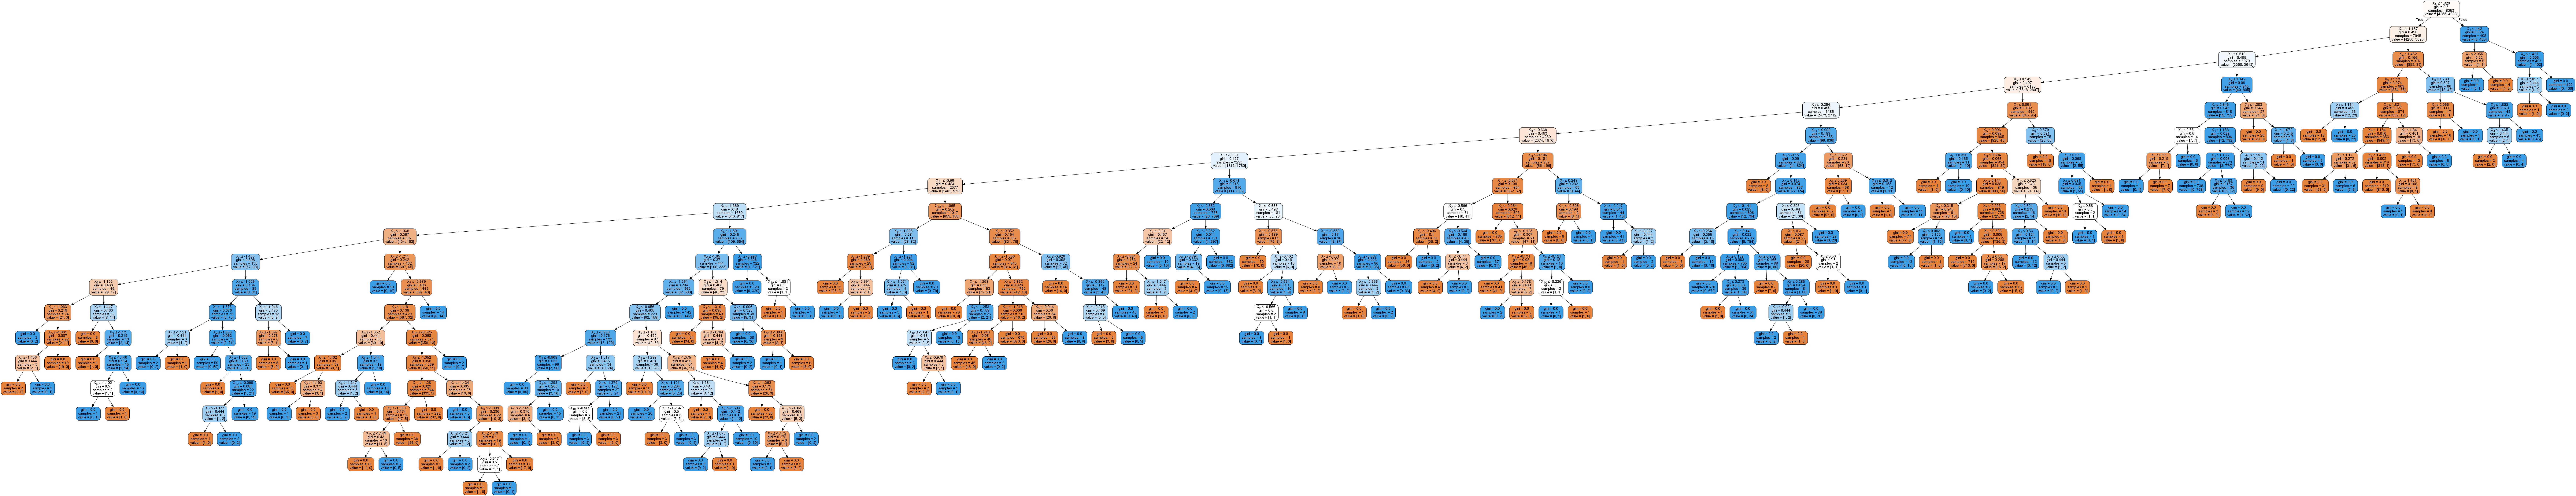

In [38]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(dtree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [272]:
from sklearn.ensemble import RandomForestClassifier

In [283]:
rfc = RandomForestClassifier(n_estimators=600)

In [284]:
rfc.fit(X_train,y_train)

C:\Users\trevo\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=600, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [285]:
pred = rfc.predict(X_test)

In [286]:
print(confusion_matrix(y_test,pred))

[[1798   35]
 [  35 1713]]


In [287]:
print(classification_report(y_test,pred))

             precision    recall  f1-score   support

          0       0.98      0.98      0.98      1833
          1       0.98      0.98      0.98      1748

avg / total       0.98      0.98      0.98      3581



In [294]:
features = X.columns
features

Index(['1 - Lever position (lp) [ ]', '2 - Ship speed (v) [knots]',
       '3 - Gas Turbine shaft torque (GTT) [kN m]',
       '4 - Gas Turbine rate of revolutions (GTn) [rpm]',
       '5 - Gas Generator rate of revolutions (GGn) [rpm]',
       '6 - Starboard Propeller Torque (Ts) [kN]',
       '7 - Port Propeller Torque (Tp) [kN]',
       '8 - HP Turbine exit temperature (T48) [C]',
       '10 - GT Compressor outlet air temperature (T2) [C]',
       '11 - HP Turbine exit pressure (P48) [bar]',
       '13 - GT Compressor outlet air pressure (P2) [bar]',
       '14 - Gas Turbine exhaust gas pressure (Pexh) [bar]',
       '15 - Turbine Injecton Control (TIC) [%]',
       '16 - Fuel flow (mf) [kg/s]'],
      dtype='object')

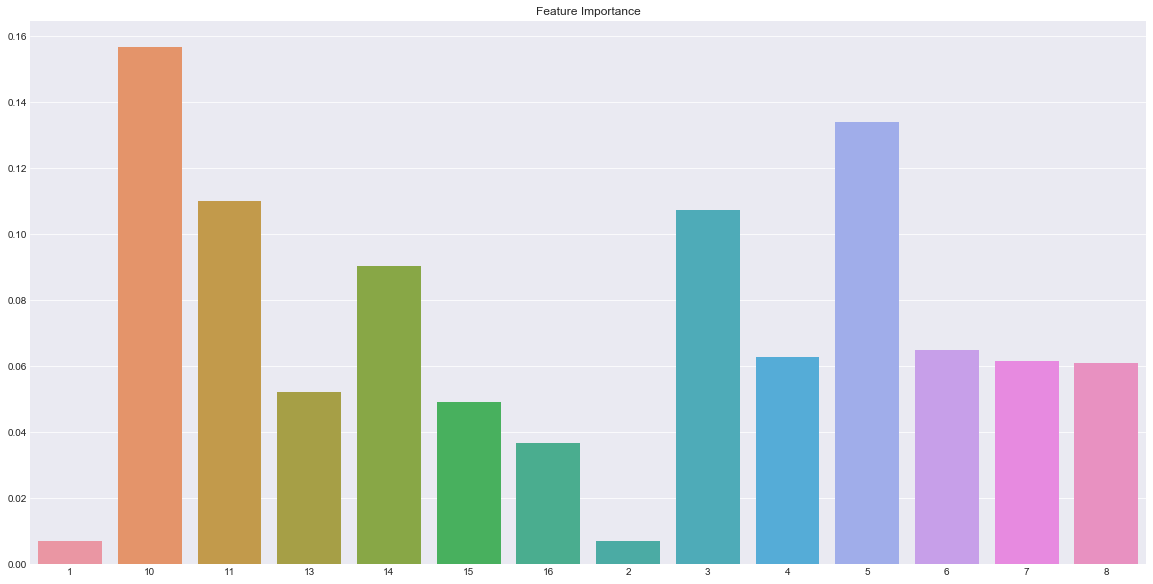

In [306]:
importances = rfc.feature_importances_
plt.figure(figsize=(20,10))
plt.title('Feature Importance')
sns.barplot(x=['1','2','3','4','5','6','7','8','10','11','13','14','15','16'],y=importances)